In this code, I'll be trying to automate a linear regression for any stock given a 1 year period.

In [72]:
#Import the neccessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
import yfinance as yahoofinance

Getting 1 year of historical data given the stock

In [73]:
#Input any stock to get historical data
asset = input()
data = yahoofinance.download(asset)
ticker = yahoofinance.Ticker(asset)
data = ticker.history(period="1y")

NVDA
[*********************100%%**********************]  1 of 1 completed


In [74]:
data = data.reset_index()

In [75]:
close = data.Close

Getting the count of the index to use it when creating the linear regression

In [76]:
data_range = []
for i in range(len(close)):
    data_range.append(i)

In [77]:
data_range = pd.DataFrame(data_range)

In [78]:
x = data_range.values
y = close.values

Reshaping the array values as (-1,1)

In [79]:
x = x.reshape(-1,1)
poly = PolynomialFeatures(degree=1)

In [80]:
x_poly = poly.fit_transform(x)

In [81]:
poly.fit(x_poly,y)

PolynomialFeatures(degree=1)

In [82]:
linear = LinearRegression()

In [83]:
linear.fit(x_poly,y)

LinearRegression()

In [84]:
y_predict = linear.predict(x_poly)

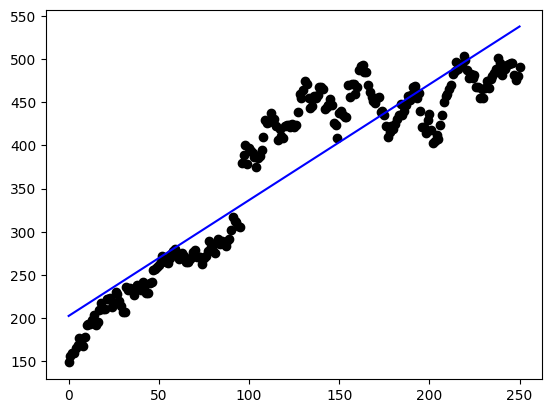

In [85]:
#Plotting the scatter plots and the linear regression model
plt.scatter(x,y, color="black")
plt.plot(x, y_predict, color="blue")

Getting the correlation of determination to see the accuracy of the model with the dataset.

In [86]:
r_squared = r2_score(y,y_predict)
print("r_squared valued: " ,r_squared)

r_squared valued:  0.8517330218231783


Calculating the absolue error of the model

In [87]:
absolute_error = y_predict - y

In [88]:
#Using this spread to calculate the 2 standard deviation range
table = pd.Series(absolute_error)
spread = pd.DataFrame(table)

In [89]:
spread

,0
0,53.920430
1,47.575322
2,46.108036
3,46.529941
4,42.773638
...,...
246,37.227551
247,52.109035
248,59.440501
249,56.491968


Transforming the data into a zscore to get a upper and lower band to see the second deviation range.

In [90]:
#Transforming the data into a zscore
mean = spread.mean()
stdev = spread.std()
zscore = (spread - mean) / stdev

Text(0.5, 1.0, 'Spread')

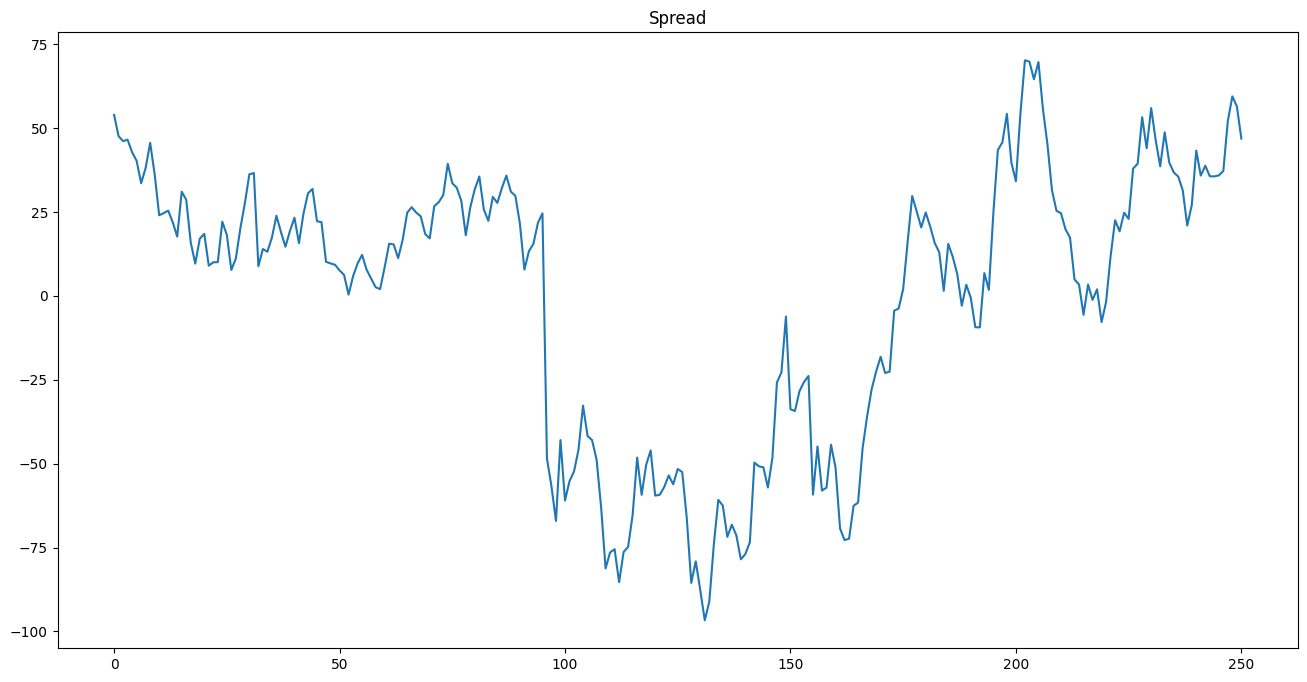

In [91]:
plt.figure(figsize=(16,8))
plt.plot(spread)
plt.title("Spread")

Text(0.5, 1.0, 'Zscore')

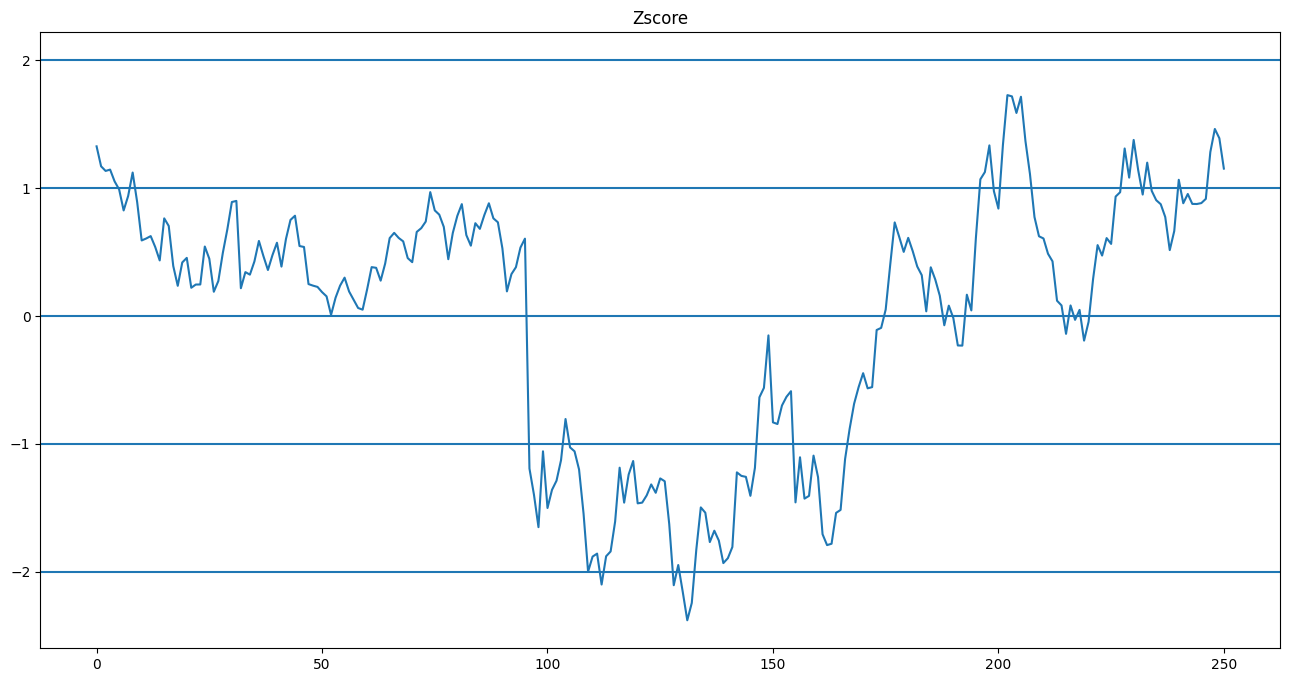

In [92]:
plt.figure(figsize=(16,8))
plt.plot(zscore)
plt.axhline(2)
plt.axhline(1)
plt.axhline(0)
plt.axhline(-1)
plt.axhline(-2)
plt.title("Zscore")

In [93]:
two_zscore = (1*stdev.sum())+mean.sum()
two_zscore

40.63495669375229

Adding and subtracting a two standard deviation to the predicted price from the linear model to achieve a 2 standard deviation range

In [94]:
upper_band = y_predict + two_zscore
lower_band = y_predict - two_zscore

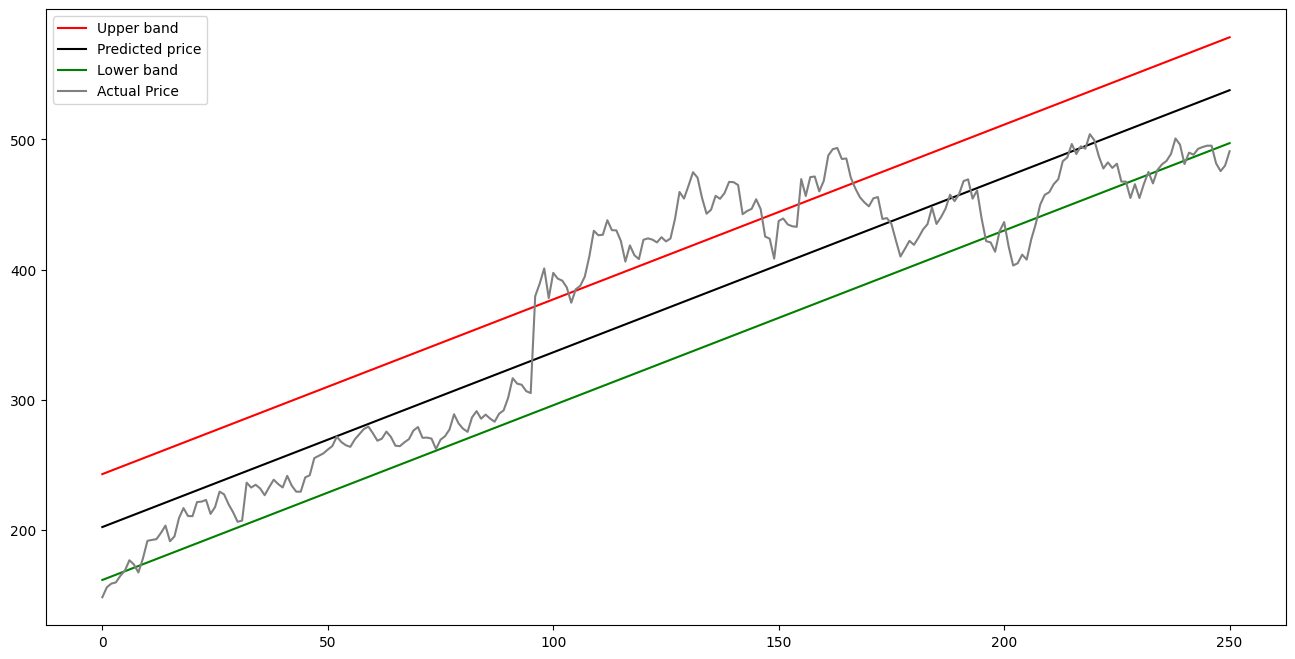

In [95]:
#Plotting the historical data with the linear regression model and the two standard deviation range
plt.figure(figsize=(16,8))
plt.plot(upper_band, color="red", label="Upper band")
plt.plot(y_predict, color="black", label="Predicted price")
plt.plot(lower_band, "green", label="Lower band")
plt.plot(data.Close, color="gray", label="Actual Price")
#plt.axhline(1.6504)
plt.legend()